In [18]:
##Imporing data for data cleaning
import pandas as pd
train = pd.read_csv("train.csv")
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
#To check number of the null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
##To drop cabin column as it has most number of null values
train.drop(columns = "Cabin", inplace = True)

In [21]:
#Filling age column with median
train['Age'] = train['Age'].fillna(train['Age'].median())

In [22]:
#Filling embarked column with mode 
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode())

In [23]:
#MApping Male and Female
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})

In [8]:
#MApping Emba
train['Embarked'] = train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

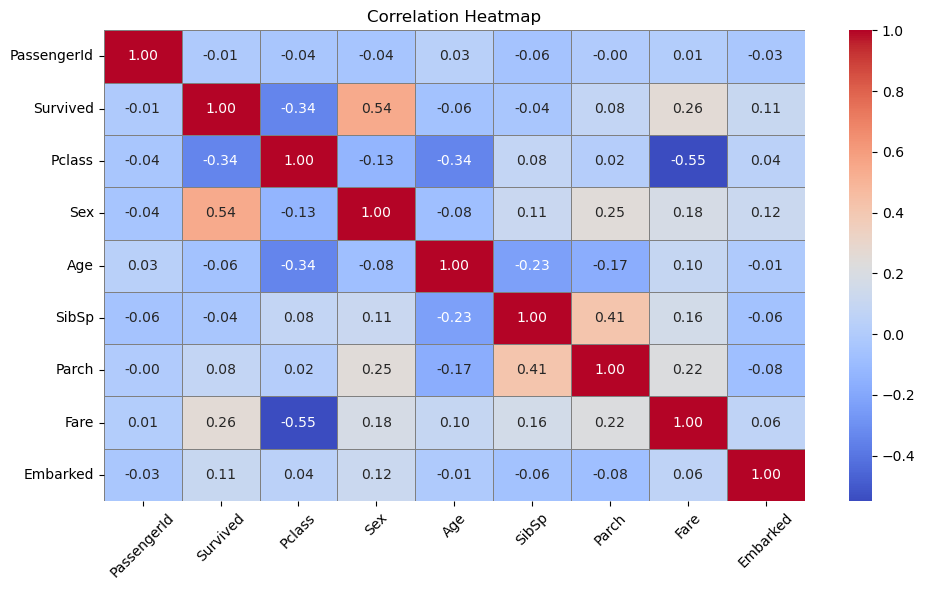

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- EDA Begins -----

# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation = train.corr(numeric_only=True)  # Ensures only numeric columns are included
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


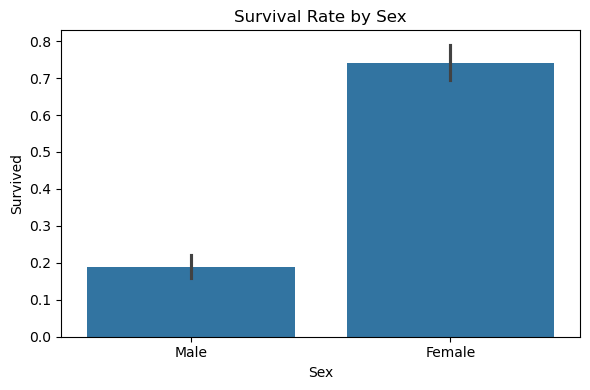

In [11]:
# 2. Survival by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x="Sex", y="Survived", data=train)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Survival Rate by Sex")
plt.tight_layout()
plt.show()

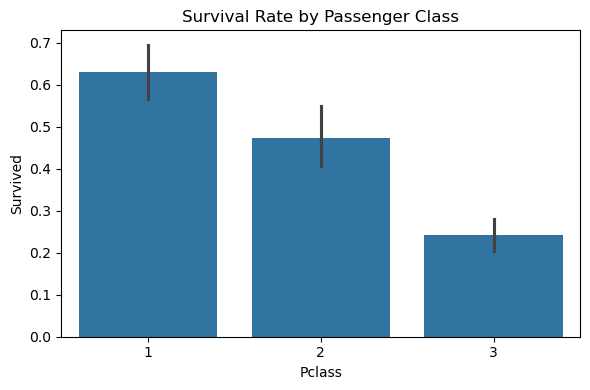

In [12]:
# 3. Survival by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival Rate by Passenger Class")
plt.tight_layout()
plt.show()

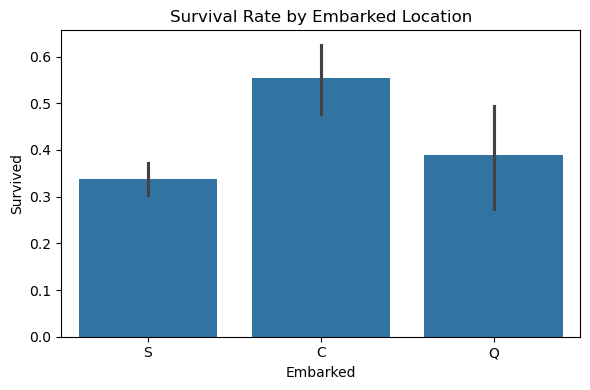

In [13]:
# 4. Survival by Embarked
plt.figure(figsize=(6, 4))
sns.barplot(x="Embarked", y="Survived", data=train)
plt.xticks([0, 1, 2], ['S', 'C', 'Q'])
plt.title("Survival Rate by Embarked Location")
plt.tight_layout()
plt.show()


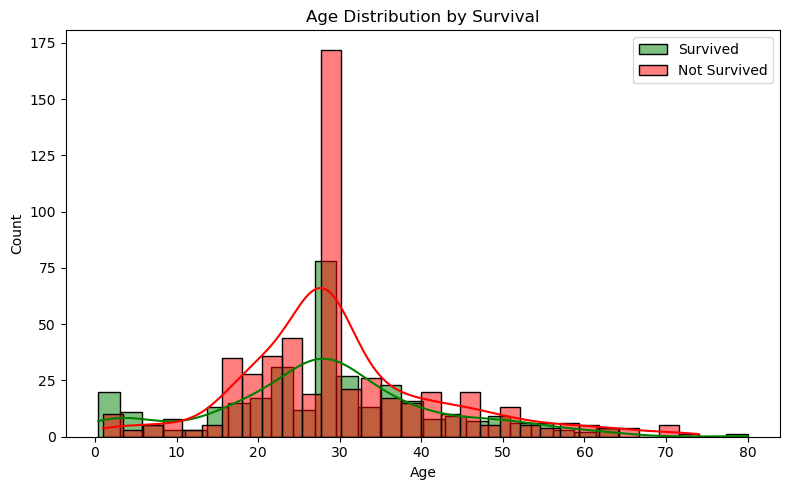

In [14]:
# 5. Age vs Survival (Histogram + KDE)
plt.figure(figsize=(8, 5))
sns.histplot(train[train.Survived == 1]["Age"], kde=True, color="green", label="Survived", bins=30)
sns.histplot(train[train.Survived == 0]["Age"], kde=True, color="red", label="Not Survived", bins=30)
plt.title("Age Distribution by Survival")
plt.legend()
plt.tight_layout()
plt.show()


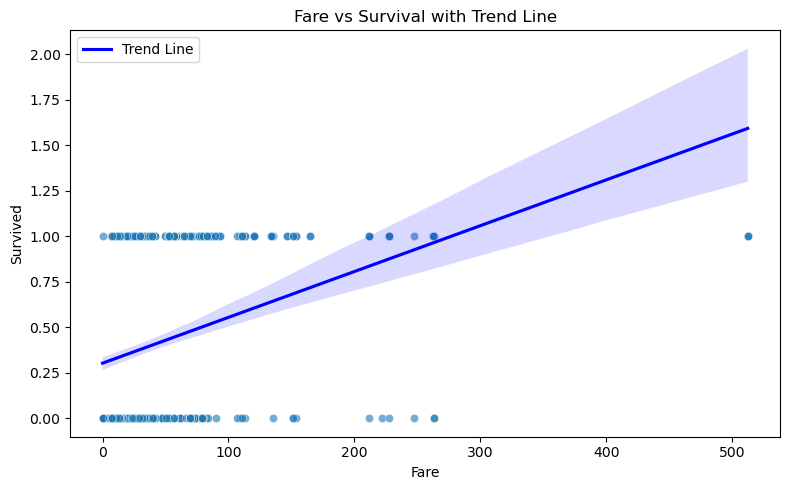

In [15]:
# 6. Fare vs Survival (with Trend Line)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Fare", y="Survived", data=train, alpha=0.6)
sns.regplot(x="Fare", y="Survived", data=train, scatter=False, color="blue", label="Trend Line")
plt.title("Fare vs Survival with Trend Line")
plt.legend()
plt.tight_layout()
plt.show()


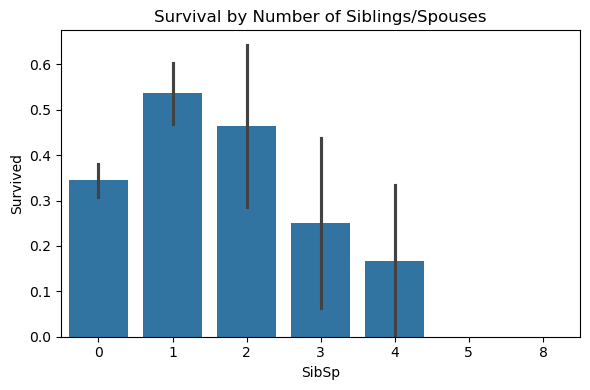

In [16]:
# 7. SibSp vs Survival
plt.figure(figsize=(6, 4))
sns.barplot(x="SibSp", y="Survived", data=train)
plt.title("Survival by Number of Siblings/Spouses")
plt.tight_layout()
plt.show()

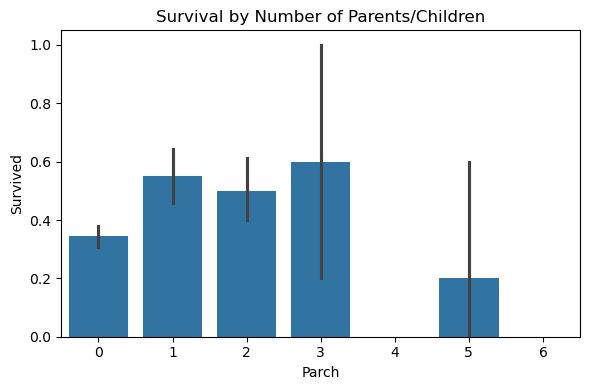

In [17]:
# 8. Parch vs Survival
plt.figure(figsize=(6, 4))
sns.barplot(x="Parch", y="Survived", data=train)
plt.title("Survival by Number of Parents/Children")
plt.tight_layout()
plt.show()